<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Basic_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

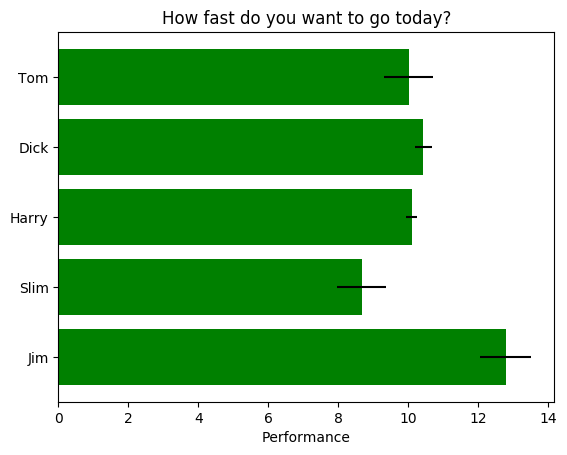

In [2]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

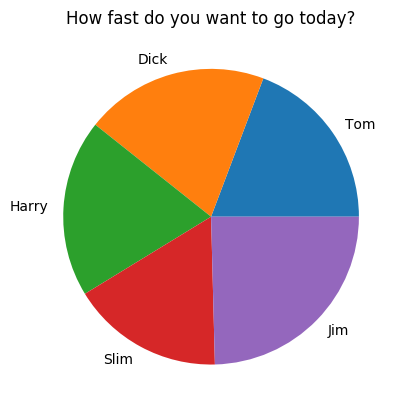

In [3]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

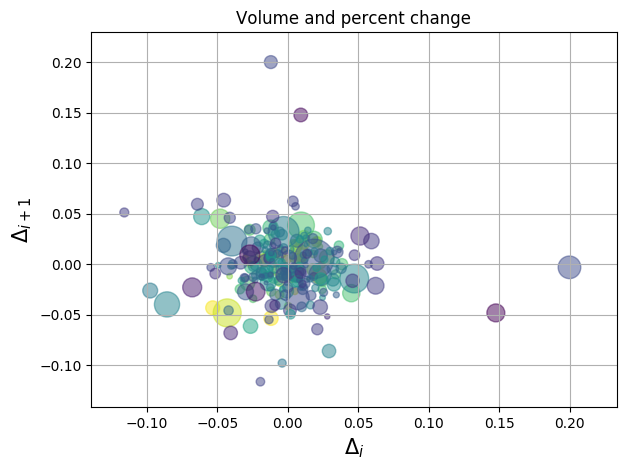

In [4]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

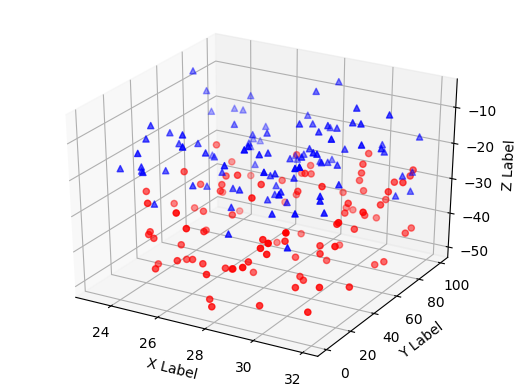

In [5]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



In [0]:
# TODO - fun, possibly interactive plots!

## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

#Country Temp Data
Sub plots to show temp is trending up in N. America

In [9]:
import pandas as pd

#create a dictionary pairing country names to their ISO3 Code, this could be expanded to include all countries
#loop through all countries and concat the ISO code and file type to the end of the URL
countries = {'Canada':'CAN',
            'UnitedStates':'USA',
            'Mexico':'MEX'}
partial_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/'
file_type = '.csv'

#create an empty data frame for each csv to merge into
temps = pd.DataFrame()

#loop through and add columns on to temps
for key in countries:
  url = (partial_url + countries[key] + file_type)
  response = pd.read_csv(url)
  #add the columns in and rename 'data' to it's respective country name
  temps['year'] = response['year']
  temps[key] = response['data']
  
#clean it up by setting the index to year
temps = temps.set_index('year')

temps.head()

,Canada,UnitedStates,Mexico
year,,,
1901,-7.672419,6.618749,20.528099
1902,-7.862711,6.464327,20.804192
1903,-7.910783,6.073844,20.176123
1904,-8.155729,6.149883,20.640743
1905,-7.547311,6.599617,20.437515


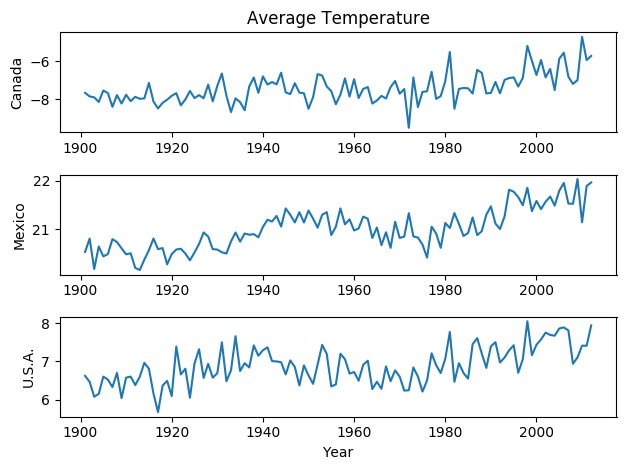

In [191]:
#subplot set up and title
plt.subplot(3, 1, 1)
plt.title('Average Temperature')

#first plot
plt.plot(temps.index, temps['Canada'])
plt.ylabel('Canada')

#second plot
plt.subplot(3, 1, 2)
plt.plot(temps.index, temps['Mexico'])
plt.ylabel('Mexico')

#third plot 
plt.subplot(3,1,3)
plt.plot(temps.index, temps['UnitedStates'])
plt.ylabel('U.S.A.')
#add a label for the X-Axis
plt.xlabel('Year')

plt.tight_layout() #keep things clean and spaced
plt.show();
#all graphs show a roughly 2 degree increase over the time scale

#Comics Data
Show the representation of men vs. women in comics

In [46]:
from google.colab import files
upload = files.upload()

Saving dc-wikia-data.csv to dc-wikia-data.csv


In [0]:
marvel_df = pd.read_csv('marvel-wikia-data.csv')
dc_df = pd.read_csv('dc-wikia-data.csv')

marvel_df['publisher'] = 'Marvel'
marvel_df = marvel_df.rename(columns = {'Year':'YEAR'})

dc_df['publisher'] = 'DC'

comic_chars_df = marvel_df.append(dc_df)

In [0]:
from pandas.api.types import is_numeric_dtype

for header in comic_chars_df:
  if is_numeric_dtype(comic_chars_df[header]):
    comic_chars_df[header] = comic_chars_df[header].fillna(-1)
  else:
    comic_chars_df[header] = comic_chars_df[header].fillna('unknown')

In [86]:
#Pulling out into smaller data frames to make it easier to work with and trouble shoot
male_heroes = comic_chars_df[comic_chars_df['SEX'] == 'Male Characters']
male_heroes.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,publisher
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,unknown,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,unknown,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,unknown,Living Characters,3061.0,Oct-74,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,unknown,Living Characters,2961.0,Mar-63,1963.0,Marvel
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,unknown,Living Characters,2258.0,Nov-50,1950.0,Marvel


male_count    0
dtype: int64


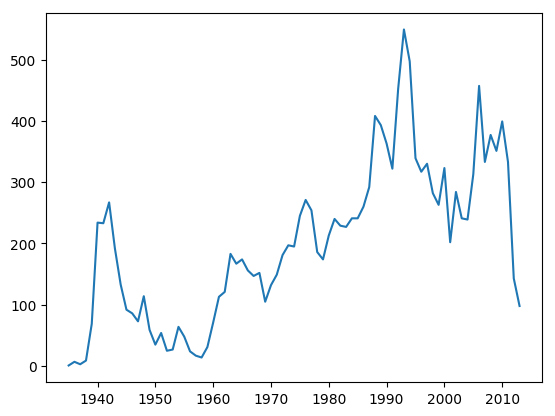

In [162]:
#here we have our plot of male superheroes with a steady trend up
#plotting this took longer than expected because my index wasn't sorted causing one funky looking graph
male_heroes = male_heroes[male_heroes['YEAR'] != -1] #drop the unknowns
male_counts = pd.DataFrame([male_heroes['YEAR'].value_counts(),male_heroes['YEAR'].unique()]).T.drop(['Unnamed 0'], axis='columns') #make a DF with new male heroes per year
male_counts.columns = ['male_count'] #rename a column
male_counts = male_counts.sort_index() #sort my index!

#test to see if it works
plt.plot(male_counts.index,male_counts['male_count'])
plt.show();

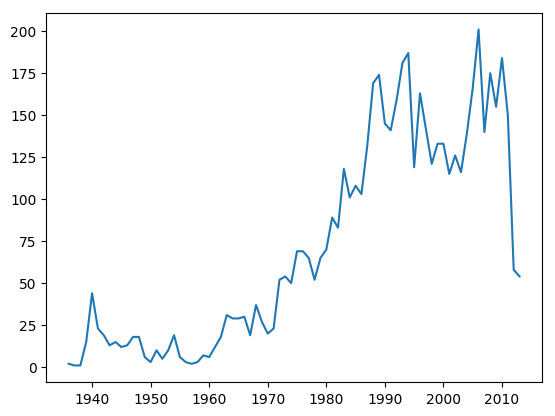

In [177]:
#same deal as the males above
#we see a much steeper climb with female heroes. Girl power!
female_heroes = comic_chars_df[comic_chars_df['SEX'] == 'Female Characters']
female_heroes = female_heroes[female_heroes['YEAR'] != -1]
female_counts = pd.DataFrame([female_heroes['YEAR'].value_counts(),female_heroes['YEAR'].unique()]).T.drop(['Unnamed 0'], axis='columns')

female_counts.columns = ['count']
female_counts = female_counts.sort_index()

plt.plot(female_counts.index,female_counts['count'])
plt.show();

In [178]:
#making a singular DF to make things easier
sex_counts = male_counts
sex_counts['female_count'] = female_counts['count']
sex_counts['female_count'] = sex_counts['female_count'].fillna(0)
sex_counts['total'] = sex_counts['male_count'] + sex_counts['female_count']
sex_counts.head()


,male_count,female_count,total
1935.0,1.0,0.0,1.0
1936.0,7.0,2.0,9.0
1937.0,3.0,1.0,4.0
1938.0,9.0,1.0,10.0
1939.0,69.0,15.0,84.0


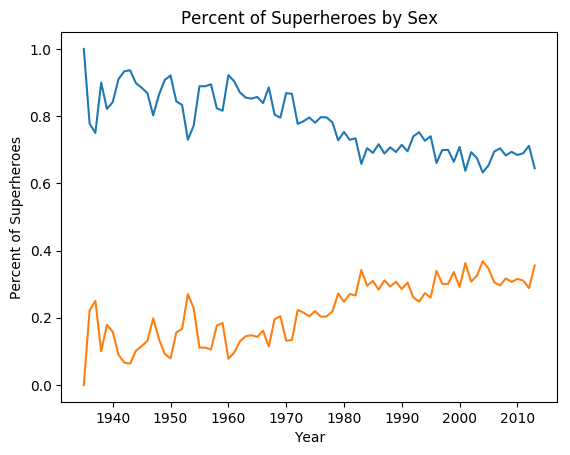

In [192]:
#The meat and potatoes, even though females had a rapid rise we can see superheroes are still male dominated
#plt.scatter(sex_counts.index, (sex_counts['male_count']/sex_counts['total']))    Commented out because the scatter wasn't as clean
#plt.scatter(sex_counts.index, (sex_counts['female_count']/sex_counts['total']))
plt.plot(sex_counts.index, (sex_counts['male_count']/sex_counts['total']))
plt.plot(sex_counts.index, (sex_counts['female_count']/sex_counts['total']))

#Adding labels and what not
plt.title('Percent of Superheroes by Sex')
plt.xlabel('Year')
plt.ylabel('Percent of Superheroes')

plt.show()